In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble  import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


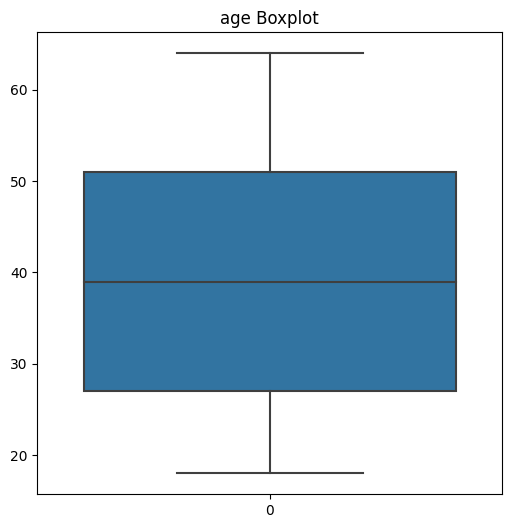

In [8]:
#checking for outliers
plt.figure(figsize=(6,6))
sns.boxplot(df.age)
plt.title('age Boxplot')
plt.show()

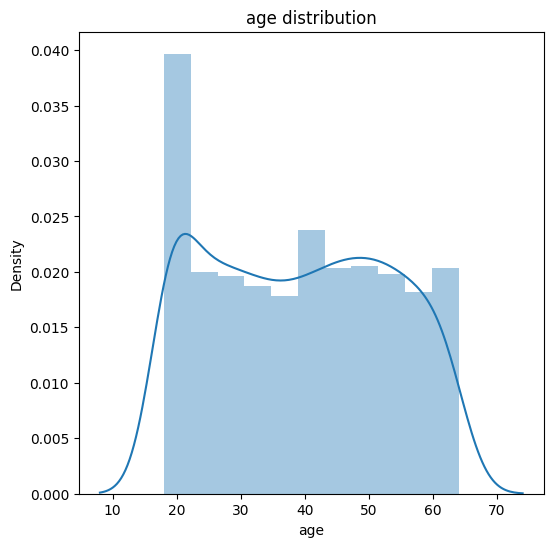

In [78]:
#checking for outliers
plt.figure(figsize=(6,6))
sns.distplot(df.age)
plt.title('age distribution')
plt.show()

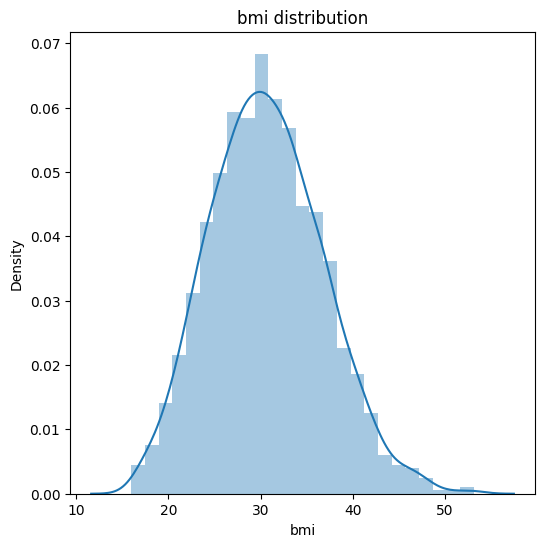

In [79]:
#checking for outliers
plt.figure(figsize=(6,6))
sns.distplot(df.bmi)
plt.title('bmi distribution')
plt.show()

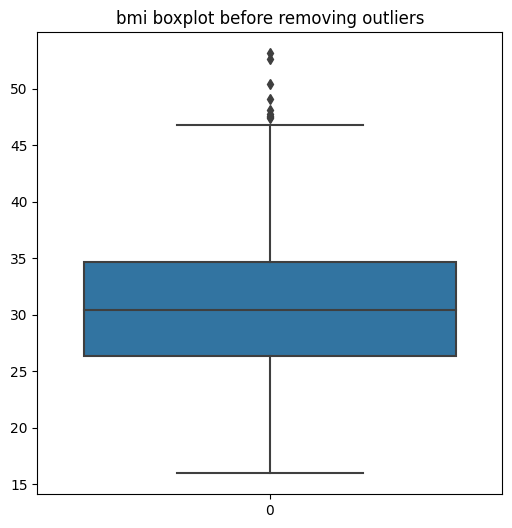

In [11]:
#checking for outliers
plt.figure(figsize=(6,6))
sns.boxplot(df.bmi)
plt.title('bmi boxplot before removing outliers')
plt.show()

In [12]:
upperlimit=df['bmi'].mean()+3*df['bmi'].std()
lowerlimit=df['bmi'].mean()-3*df['bmi'].std()

In [13]:
df1=df[(df.bmi<upperlimit)&(df.bmi>lowerlimit)]

In [14]:
df1.shape

(1334, 7)

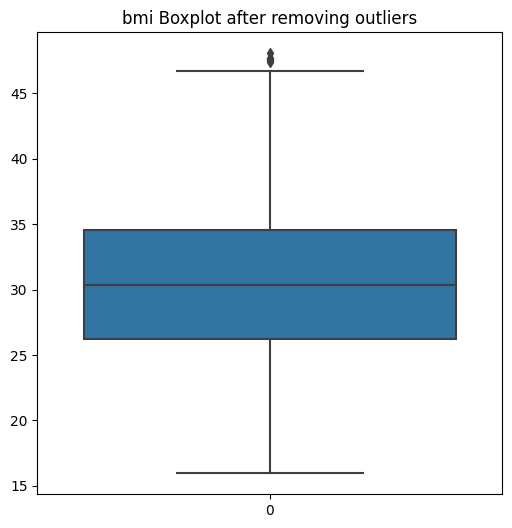

In [15]:
plt.figure(figsize=(6,6))
sns.boxplot(df1.bmi)
plt.title('bmi Boxplot after removing outliers')
plt.show()

In [16]:
df1.sex.unique()

array(['female', 'male'], dtype=object)

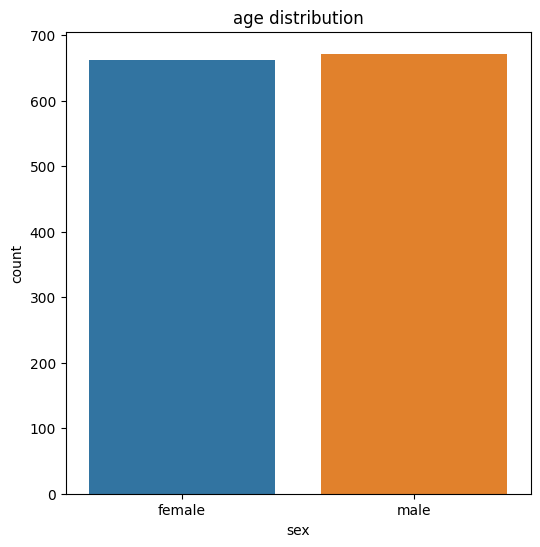

In [17]:
#checking the distribution of feature sex
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df1)
plt.title('age distribution')
plt.show()

In [18]:
df1.sex.value_counts()

sex
male      672
female    662
Name: count, dtype: int64

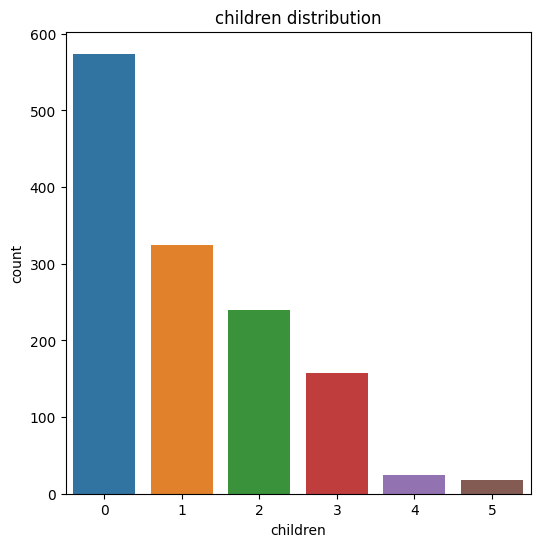

In [19]:
#checking the distribution of feature age
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=df)
plt.title('children distribution')
plt.show()

In [20]:
df1.children.value_counts()

children
0    572
1    322
2    240
3    157
4     25
5     18
Name: count, dtype: int64

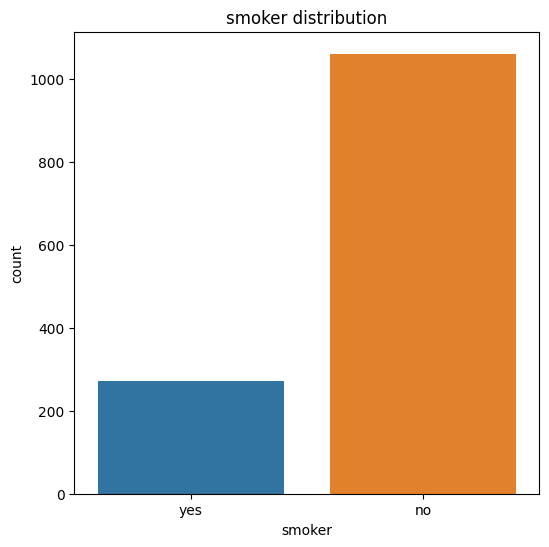

In [21]:
#checking the distribution of feature age
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=df1)
plt.title('smoker distribution')
plt.show()

In [22]:
df1.smoker.unique()

array(['yes', 'no'], dtype=object)

In [23]:
df1.smoker.value_counts()

smoker
no     1061
yes     273
Name: count, dtype: int64

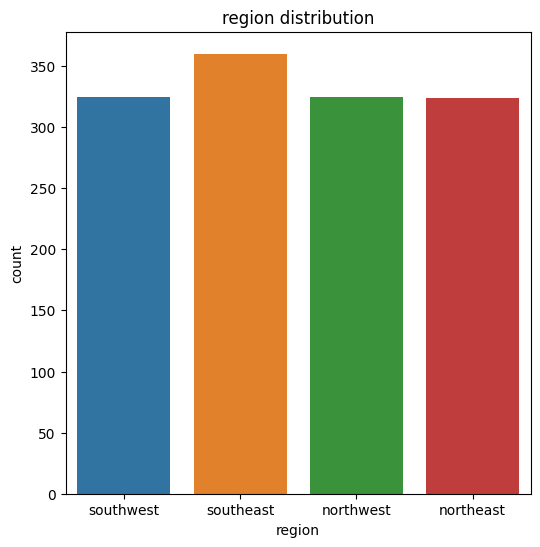

In [24]:
#checking the distribution of feature age
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=df1)
plt.title('region distribution')
plt.show()

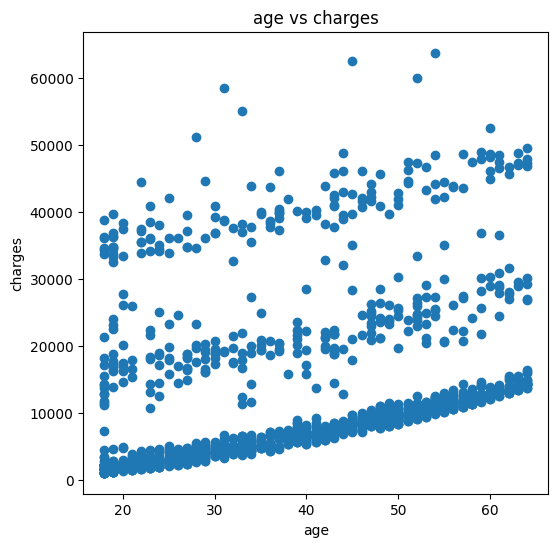

In [25]:
plt.figure(figsize=(6,6))
plt.scatter(df.age,df.charges)
plt.title('age vs charges')
plt.xlabel('age')
plt.ylabel('charges')
plt.show()

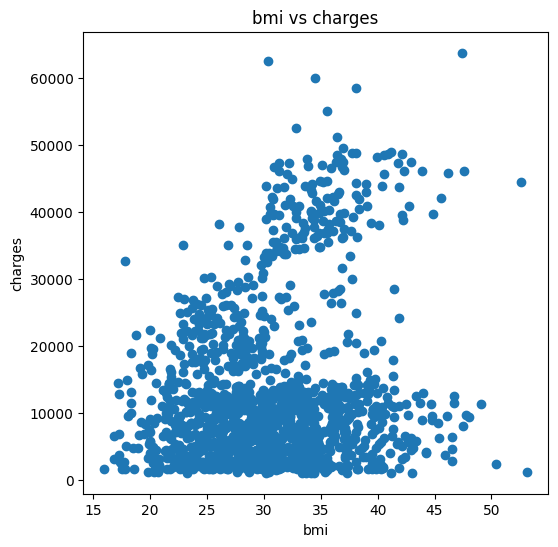

In [26]:
plt.figure(figsize=(6,6))
plt.scatter(df.bmi,df.charges)
plt.title('bmi vs charges')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()

In [27]:
df1.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [28]:
df1.region.value_counts()

region
southeast    360
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

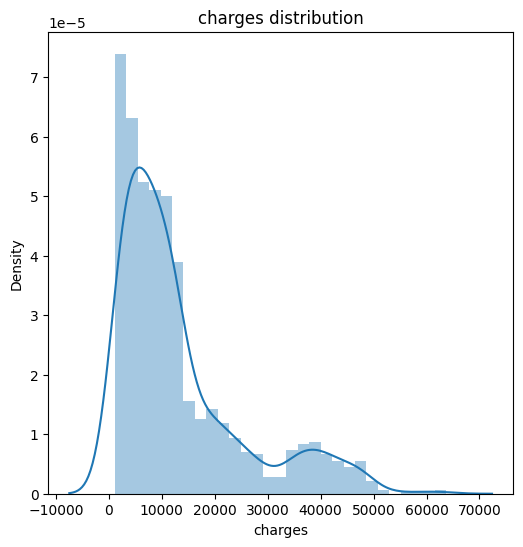

In [29]:
#checking the distribution of target feature
plt.figure(figsize=(6,6))
sns.distplot(df1.charges)
plt.title('charges distribution')
plt.show()

In [30]:

#Encoding categorical features
df1['sex']=df1['sex'].map({'male':1,'female':0})

In [31]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [32]:
df1['smoker']=df1['smoker'].map({'yes':1,'no':0})

In [33]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [34]:
df1['region']=df1['region'].map({'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3})

In [35]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [36]:
#train the model(model fitting)
X=df1.drop( columns='charges',axis=1)
Y=df1.charges

In [37]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       0
1      18    1  33.770         1       0       1
2      28    1  33.000         3       0       1
3      33    1  22.705         0       0       2
4      32    1  28.880         0       0       2
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       2
1334   18    0  31.920         0       0       3
1335   18    0  36.850         0       0       1
1336   21    0  25.800         0       0       0
1337   61    0  29.070         0       1       2

[1334 rows x 6 columns]


In [38]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1334, dtype: float64


In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [40]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [41]:
knr=KNeighborsRegressor()
knr.fit(X_train,Y_train)

KNeighborsRegressor()

In [42]:
svm=SVR()
svm.fit(X_train,Y_train)

SVR()

In [43]:
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [44]:
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [45]:
lr_test_predict=lr.predict(X_test)

In [46]:
knr_test_predict=knr.predict(X_test)

In [47]:
print(metrics.r2_score(Y_test,knr_test_predict))

0.10123659318840328


In [48]:
print('MAE',mean_absolute_error(Y_test,knr_test_predict))

MAE 7977.576792110862


In [49]:
svm_test_predict=svm.predict(X_test)

In [50]:
rf_test_predict=rf.predict(X_test)

In [51]:
dt_test_predict=dt.predict(X_test)

In [52]:
#calculating r2 score
lr_r2_score=metrics.r2_score(Y_test,lr_test_predict)

In [53]:
#calculating mean squared error of linear regression model
print('MSE',np.sqrt(mean_squared_error(Y_test,lr_test_predict)))

MSE 5815.325524077313


In [54]:
#calculating mean absolute error of linear regression model
print('MAE',mean_absolute_error(Y_test,lr_test_predict))

MAE 4081.905864784823


In [55]:
#adjusted r2_score of linear regression
lr_adjst_r2_score=1-((1-lr_r2_score)*(40-1)/(40-1-6))

In [56]:
lr_adjst_r2_score

0.7021849990623215

In [57]:
lr_r2_score

0.748002691514272

In [58]:
#calculating r2 score
svm_r2_score=metrics.r2_score(Y_test,svm_test_predict)

In [59]:
#calculating mean absolute error of suport vector regressor model
print('MAE',mean_absolute_error(Y_test,svm_test_predict))

MAE 7958.817450554057


In [60]:
#calculating mean absolute error of support vector regessor model
print('MAE',np.sqrt(mean_squared_error(Y_test,svm_test_predict)))

MAE 12163.226807669838


In [61]:
#adjusted r2_score of support vector regressor
svm_adjst_r2_score=1-((1-svm_r2_score)*(40-1)/(40-1-6))

In [62]:
svm_r2_score

-0.10241585842730583

In [63]:
#calculating r2 score
rf_r2_score=metrics.r2_score(Y_test,rf_test_predict)

In [64]:
#calculating mean squared  eror random forest regressor model
print('RF_MSE',np.sqrt(mean_squared_error(Y_test,rf_test_predict)))

RF_MSE 4746.495900472816


In [65]:
#calculating mean  absolute error of random forest  regressor model
print('RF_MAE',mean_absolute_error(Y_test,rf_test_predict))

RF_MAE 2747.16895213133


In [66]:
#adjusted r2_score of fandom forest
rf_adjst_r2_score=1-((1-rf_r2_score)*(40-1)/(40-1-6))

In [67]:
rf_adjst_r2_score

0.8015986014722061

In [68]:
#random forest r2 score
rf_r2_score

0.8321218935534052

In [69]:
#calculating r2 score for decision tree
dt_r2_score=metrics.r2_score(Y_test,dt_test_predict)

In [70]:
#calculating mean squared error of decision tree regressor model
print('DT_MSE',np.sqrt(mean_squared_error(Y_test,dt_test_predict)))

DT_MSE 6820.923134496706


In [71]:
#calculating mean absolute error of decision tree regressor model
print('DT_MAE',(mean_absolute_error(Y_test,dt_test_predict)))

DT_MAE 3318.268216741573


In [72]:
#adjusted r2_score of decision tree
dt_adjst_r2_score=1-((1-dt_r2_score)*(40-1)/(40-1-6))

In [73]:
dt_adjst_r2_score

0.5902822115318132

In [74]:
#r2_score for decision tree 
dt_r2_score

0.6533157174499957

In [77]:
#building a predictive model
input_data=(20,1,22,1,0,1)
input_as_nparray=np.asarray(input_data)
reshaped_input=input_as_nparray.reshape(1,-1)
prediction=rf.predict(reshaped_input)
print(prediction)

[2557.9516735]
